In [1]:
using Gurobi, JuMP
using Statistics, Random, Distributions
using BenchmarkTools

In [2]:
gurobi_env = Gurobi.Env();

Academic license - for non-commercial use only - expires 2021-07-23


In [3]:
function add_noise(c_observed, noise)
    n = size(c_observed)[1]
    m = size(c_observed)[2]
    c = zeros(n, m)
    for j = 1:n
        for i = 1:m
            epsilon = (1 - noise) + 2 * noise*rand()
            c[j, i] = c_observed[j, i] * epsilon
        end
    end
    return c
end

add_noise (generic function with 1 method)

In [4]:
function objective_fun(c,w)
#     return sum(c .* w .* w)
     return sum(c .* w)
end

objective_fun (generic function with 1 method)

In [6]:
include("./local.jl")
include("shortest_path_oracle.jl")
include("util.jl")
import .Local

loss_only = true

grid_dim = 5
p_features = 10
n_train = 100
holdout_percent = 0.25
n_holdout = round(Int, holdout_percent*n_train) 
n_test = 1000

sources, destinations = convert_grid_to_list(grid_dim, grid_dim)
sp_oracle = sp_flow_jump_setup_mine(sources, destinations, 1, grid_dim^2, gurobiEnv = gurobi_env)

d_feasibleregion = length(sources)
B_true = rand(Bernoulli(0.5), d_feasibleregion, p_features);

┌ Warning: `Grid` is deprecated, use `grid` instead.
│   caller = convert_grid_to_list(::Int64, ::Int64) at shortest_path_oracle.jl:95
└ @ Main /home/rares/Desktop/spo/Cap/shortest_path_oracle.jl:95


In [7]:
function solve_lp(c)
    m = sp_oracle(c)
    MOI.set(m, MOI.Silent(), true)
    @objective(m, Min, objective_fun(c, m[:w]))
    optimize!(m)
    return value.(m[:w])
end;

In [8]:
include("./local.jl")
include("shortest_path_oracle.jl")
include("util.jl")
import .Local

n_train = 800

# noise = 0.0
(X_train, c_train_original) = generate_poly_kernel_data_simple(B_true, n_train, 1, 0)
(X_validation, c_validation) = generate_poly_kernel_data_simple(B_true, n_holdout, 1, 0)
(X_test, c_test) = generate_poly_kernel_data_simple(B_true, n_test, 1, 0)

# n_sigmoid = 5dt
# B_true_1 = rand(Bernoulli(0.25), n_sigmoid, p_features)
# B_true_2 = rand(Bernoulli(0.5), d_feasibleregion, n_sigmoid)

# (X_train, c_train_original) = sigmoid_data(B_true_1, B_true_2, p_features, n_train)
# (X_validation, c_validation) = sigmoid_data(B_true_1, B_true_2, p_features, n_holdout)
# (X_test, c_test) = sigmoid_data(B_true_1, B_true_2, p_features, n_test)

c_train = c_train_original;

In [28]:
# for noise in 0.0:0.05:1.0
#     linear = string(noise)
# #     println(linear)
    
#     c_train = add_noise(c_train_original, noise);

#     writedlm(string("sp/X_train", linear, ".csv"),  X_train, ',')
#     writedlm(string("sp/X_validation", linear, ".csv"),  X_validation, ',')
#     writedlm(string("sp/X_test", linear, ".csv"),  X_test, ',')

#     writedlm(string("sp/c_train", linear, ".csv"),  c_train, ',')
#     writedlm(string("sp/c_validation", linear, ".csv"), c_validation, ',')
#     writedlm(string("sp/c_test", linear, ".csv"),  c_test, ',')
# end

0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
1.0


In [11]:
using DelimitedFiles

function get_data(noise)
    linear = string(noise)
    X_train  = readdlm(string("sp/X_train", linear, ".csv"),  ',')
    X_validation = readdlm(string("sp/X_validation", linear, ".csv"),  ',')
    X_test = readdlm(string("sp/X_test", linear, ".csv"),  ',')

    c_train = readdlm(string("sp/c_train", linear, ".csv"),  ',')
    c_validation = readdlm(string("sp/c_validation", linear, ".csv"), ',')
    c_test = readdlm(string("sp/c_test", linear, ".csv"),  ',');

    return X_train, c_train, X_validation, c_validation, X_test, c_test
end

get_data (generic function with 1 method)

In [148]:
# noise = 0.0
# c_train = add_noise(c_train_original, noise);

In [9]:
true_weights = Vector{Vector{Float64}}()
validation_weights =  Vector{Vector{Float64}}()
for i = 1:n_test
    println("Run: ", i)
    true_cost = c_test[:,i]
    true_w = solve_lp(true_cost)
    push!(true_weights, true_w)    
end

for i = 1:n_holdout
    println("Run: ", i)
    true_cost = c_validation[:,i]
    true_w_ = solve_lp(true_cost)
    push!(validation_weights, true_w_)    
end

Run: 1


┌ Warning: `with_optimizer` is deprecated, replace `with_optimizer(Gurobi.Optimizer, env)` by `() -> Gurobi.Optimizer(env)`.
│   caller = ip:0x0
└ @ Core :-1
┌ Warning: `with_optimizer` is deprecated, replace `with_optimizer(Ipopt.Optimizer)` by `Ipopt.Optimizer`.
│   caller = #with_optimizer#6(::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}, ::Function, ::Type, ::Gurobi.Env) at JuMP.jl:122
└ @ JuMP /home/rares/.julia/packages/JuMP/Sp4sR/src/JuMP.jl:122


Run: 2
Run: 3
Run: 4
Run: 5
Run: 6
Run: 7
Run: 8
Run: 9
Run: 10
Run: 11
Run: 12
Run: 13
Run: 14
Run: 15
Run: 16
Run: 17
Run: 18
Run: 19
Run: 20
Run: 21
Run: 22
Run: 23
Run: 24
Run: 25
Run: 26
Run: 27
Run: 28
Run: 29
Run: 30
Run: 31
Run: 32
Run: 33
Run: 34
Run: 35
Run: 36
Run: 37
Run: 38
Run: 39
Run: 40
Run: 41
Run: 42
Run: 43
Run: 44
Run: 45
Run: 46
Run: 47
Run: 48
Run: 49
Run: 50
Run: 51
Run: 52
Run: 53
Run: 54
Run: 55
Run: 56
Run: 57
Run: 58
Run: 59
Run: 60
Run: 61
Run: 62
Run: 63
Run: 64
Run: 65
Run: 66
Run: 67
Run: 68
Run: 69
Run: 70
Run: 71
Run: 72
Run: 73
Run: 74
Run: 75
Run: 76
Run: 77
Run: 78
Run: 79
Run: 80
Run: 81
Run: 82
Run: 83
Run: 84
Run: 85
Run: 86
Run: 87
Run: 88
Run: 89
Run: 90
Run: 91
Run: 92
Run: 93
Run: 94
Run: 95
Run: 96
Run: 97
Run: 98
Run: 99
Run: 100
Run: 101
Run: 102
Run: 103
Run: 104
Run: 105
Run: 106
Run: 107
Run: 108
Run: 109
Run: 110
Run: 111
Run: 112
Run: 113
Run: 114
Run: 115
Run: 116
Run: 117
Run: 118
Run: 119
Run: 120
Run: 121
Run: 122
Run: 123
Run: 124

Run: 937
Run: 938
Run: 939
Run: 940
Run: 941
Run: 942
Run: 943
Run: 944
Run: 945
Run: 946
Run: 947
Run: 948
Run: 949
Run: 950
Run: 951
Run: 952
Run: 953
Run: 954
Run: 955
Run: 956
Run: 957
Run: 958
Run: 959
Run: 960
Run: 961
Run: 962
Run: 963
Run: 964
Run: 965
Run: 966
Run: 967
Run: 968
Run: 969
Run: 970
Run: 971
Run: 972
Run: 973
Run: 974
Run: 975
Run: 976
Run: 977
Run: 978
Run: 979
Run: 980
Run: 981
Run: 982
Run: 983
Run: 984
Run: 985
Run: 986
Run: 987
Run: 988
Run: 989
Run: 990
Run: 991
Run: 992
Run: 993
Run: 994
Run: 995
Run: 996
Run: 997
Run: 998
Run: 999
Run: 1000
Run: 1
Run: 2
Run: 3
Run: 4
Run: 5
Run: 6
Run: 7
Run: 8
Run: 9
Run: 10
Run: 11
Run: 12
Run: 13
Run: 14
Run: 15
Run: 16
Run: 17
Run: 18
Run: 19
Run: 20
Run: 21
Run: 22
Run: 23
Run: 24
Run: 25


In [9]:
include("./local.jl")
import .Local

using ScikitLearn
@sk_import neighbors: KNeighborsRegressor

@sk_import neural_network: MLPRegressor

function eval_two_stage(predictor)
    all_errors = Vector{Float64}()
    nn_all_errors = Vector{Float64}()
    true_objs = Vector{Float64}()
    my_objs = Vector{Float64}()

    adam_loss = 0
    nn_adam_loss = 0
    trivial_loss = 0 
    my_loss = 0
    optimum = 0
    for i = 1:size(c_test)[2]
        x = X_test[:,i]
        true_cost = c_test[:,i]

        true_obj = objective_fun(true_cost, true_weights[i,:][1])

        nn_c = predictor(x)
        nn_presc = solve_lp(nn_c)
        nn_obj = objective_fun(true_cost, nn_presc)

        if nn_obj < true_obj
            println("NOOOOOOOO- -------------------------")
        end

        nn_error = (nn_obj - true_obj) / true_obj
#         println(nn_error)

        push!(nn_all_errors, nn_error)

#         println("VALUES: ", mean(nn_all_errors), " ", median(nn_all_errors))
    end;
    
    return mean(nn_all_errors), nn_all_errors
end

eval_two_stage (generic function with 1 method)

In [10]:
include("./DT.jl")
import .DecisionTree_

function eval_regression_tree()
    best = 1e5
    d = -1
    params = 0
    for depth = 1:2:30
        for samples in 1:9:30
            tree = DecisionTree_.train_tree_(X_train', c_train'; depth = depth, min_samples_leaf = samples)
            adam_loss, errors = DecisionTree_.evaluate_tree_(X_test', c_test', tree, sp_oracle, objective_fun; loss_only = false)
            mm = mean(errors)
            if mm < best
                best = mm 
                params = depth, samples
            end
        end
    end
    return best, params
end

eval_regression_tree (generic function with 1 method)

In [53]:
eval_regression_tree()

┌ Warning: `with_optimizer` is deprecated, replace `with_optimizer(Ipopt.Optimizer)` by `Ipopt.Optimizer`.
│   caller = #with_optimizer#6(::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}, ::Function, ::Type, ::Gurobi.Env) at JuMP.jl:122
└ @ JuMP /home/rares/.julia/packages/JuMP/Sp4sR/src/JuMP.jl:122


(0.4107067879471496, (1, 10))

In [55]:
function eval_prescriptive_tree(tree, tree_prescription)
    tree_bk = Vector{Float64}()
    for i = 1:n_test
        x = X_test[:,i]
        true_cost = c_test[:,i]

        true_obj = objective_fun(true_cost, true_weights[i,:][1])

        leaf = tree.apply([x])[1]
        tree_obj = objective_fun(true_cost, tree_prescription[leaf])
        error = (tree_obj - true_obj) / true_obj

        push!(tree_bk, error)
    end;
    return mean(tree_bk)
end

function get_prescriptive_tree()
    best = 100000
    params = -1
    for depth = 1:2:30
        for samples in 1:9:30
    
            tree = DecisionTree_.train_tree_(X_train', c_train'; depth = depth, min_samples_leaf = samples)

            bins = tree.apply(X_train')
            tree_region = Dict()
            for i = 1:n_train 
                if haskey(tree_region, bins[i])
                    cur = tree_region[bins[i]]  
                    push!(cur, i)
                else
                    cur = [i]
                end
                tree_region[bins[i]] = cur
            end 

            tree_prescription = Dict()
            for (key, vals) in tree_region
                m = sp_oracle(zeros(d_feasibleregion))
                MOI.set(m, MOI.Silent(), true)

                @objective(m, Min, sum( objective_fun(c_train[:,v], m[:w]) for v in vals))

                optimize!(m)
                tree_prescription[key] = value.(m[:w])
            end          
           
            mm = eval_prescriptive_tree(tree, tree_prescription)
            if mm < best 
                best = mm 
                params = depth, samples, tree, tree_prescription
            end
            
        end
    end
    return best, params
end

get_prescriptive_tree (generic function with 1 method)

In [56]:
get_prescriptive_tree()

(0.4107067879471496, (1, 10, PyObject DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'), Dict{Any,Any}(2=>[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],1=>[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0])))

In [12]:
# Least Squares
include("./least_squares.jl")
import .LS

function eval_least_squares()
    B = LS.train(X_train, c_train; epochs=200, lr = 1e-2);

    adam_loss, ls_errors = LS.evaluate_B(X_test, c_test, B, sp_oracle, objective_fun; loss_only = false)
    return mean(ls_errors)
end

eval_least_squares (generic function with 1 method)

In [17]:
using Plots
median(ls_errors)

0.41867768669797467

In [49]:
include("./local.jl")
import .Local

function eval(P, x_data, c_data, true_weights)
    all_errors = Vector{Float64}()
    n = size(c_data)[2]
    total = 0
    sum_all = 0
#     println(size(c_data))
    for i = 1:n
        x = x_data[:,i]
        true_cost = c_data[:,i]

        true_obj = objective_fun(true_cost, true_weights[i,:][1])

        my_prescription = Local.predict(P, x; eps = 0)
        my_obj = objective_fun(true_cost, my_prescription)

#         println(true_obj,  " ", my_obj, " ", (my_obj - true_obj) / true_obj)
        
        total += (my_obj - true_obj)
        sum_all += true_obj
        error = (my_obj - true_obj) / true_obj
        push!(all_errors, error)
        if i % 10 == 0
            println(mean(all_errors))
        end
    end;
    
    println("LOSS        : ", total / sum_all)
    println("MEAN   ERROR: ", mean(all_errors))
    println("MEDIAN ERROR: ", median(all_errors))
    return mean(all_errors), all_errors
end

eval (generic function with 2 methods)

In [128]:
include("./local.jl")

using ScikitLearn
@sk_import tree: DecisionTreeClassifier
@sk_import neural_network: MLPClassifier
@sk_import ensemble: RandomForestClassifier
@sk_import neighbors: KNeighborsClassifier

function cross_validate(P, epsilons; model = :nn, widths = [10, 30, 50, 70], test = false, use_validation_data = false)
    weights = true_weights
    x_data = X_test
    c_data = c_test
    if use_validation_data
        x_data = X_validation
        c_data = c_validation
        weights = validation_weights
    end
    
    all_error = 0
    results = Vector{Any}()
    for EPS in epsilons 
        if !test
            Local.init_n(P, EPS)
            for i=1:n_train
                println(size(P.N[i,:][1]))
            end
        end
        
        if model == :nn 
            for w in widths
                if !test
                    Local.init_models(P, 
                        MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(w), random_state=1));
                end 
                
                err = eval(P, x_data, c_data, weights)
                println(EPS, " ", w)
                push!(results, (EPS, w, err))
            end
        
        elseif model == :dt
            if !test
                Local.init_models(P, DecisionTreeClassifier(class_weight="balanced", min_samples_leaf = 5));
            end
            err, all_error = eval(P, x_data, c_data, weights)
            push!(results, (EPS, err))
            println(EPS)
        elseif model == :knn 
            if !test
                Local.init_models(P, KNeighborsClassifier(n_neighbors = 3))
            end 
            err, all_error = eval(P, x_data, c_data, weights)
            push!(results, (EPS, err))
            println(EPS)
        end
        
    end
    return results, all_error
end

cross_validate (generic function with 1 method)

In [152]:
include("./local.jl")
import .Local
P = Local.Problem(sp_oracle, objective_fun, X_train', c_train'; cap_type = :regret);

results, all_errors = cross_validate(P, .02; widths = [(200)], 
                            model = :nn, use_validation_data = false);

(18,)
(42,)
(79,)
(14,)
(48,)
(40,)
(99,)
(90,)
(86,)
(47,)
(49,)
(18,)
(86,)
(23,)
(79,)
(50,)
(77,)
(11,)
(14,)
(47,)
(112,)
(86,)
(9,)
(5,)
(86,)
(35,)
(48,)
(65,)
(122,)
(39,)
(23,)
(84,)
(42,)
(122,)
(33,)
(41,)
(54,)
(58,)
(96,)
(72,)
(134,)
(22,)
(31,)
(42,)
(20,)
(100,)
(17,)
(54,)
(32,)
(31,)
(82,)
(158,)
(27,)
(79,)
(24,)
(31,)
(86,)
(69,)
(24,)
(13,)
(129,)
(136,)
(38,)
(122,)
(76,)
(50,)
(30,)
(35,)
(79,)
(117,)
(210,)
(43,)
(27,)
(109,)
(134,)
(18,)
(79,)
(23,)
(84,)
(21,)
(118,)
(170,)
(50,)
(9,)
(41,)
(101,)
(117,)
(121,)
(18,)
(113,)
(203,)
(13,)
(86,)
(42,)
(35,)
(107,)
(42,)
(119,)
(12,)
(9,)
(50,)
(99,)
(180,)
(109,)
(156,)
(48,)
(86,)
(20,)
(23,)
(23,)
(60,)
(10,)
(32,)
(7,)
(116,)
(178,)
(13,)
(9,)
(41,)
(81,)
(11,)
(37,)
(79,)
(27,)
(47,)
(42,)
(86,)
(99,)
(71,)
(86,)
(41,)
(52,)
(30,)
(76,)
(31,)
(10,)
(90,)
(72,)
(86,)
(33,)
(84,)
(84,)
(81,)
(28,)
(27,)
(128,)
(22,)
(60,)
(37,)
(79,)
(40,)
(59,)
(23,)
(86,)
(129,)
(84,)
(52,)
(54,)
(79,)
(49,)
(27,)
(45,)
(42,)

0.022176447593442238
0.023995317887873152
0.03510348352381873
0.029318535197265842
0.03874887453454083
0.04301010880277375
0.04158356699957309
0.045765787550728264
0.04337504605444559
0.046314773021586673
0.05238620226271084
0.05196607147412717
0.052727342933003345
0.05121433663593253
0.05213844749628537
0.055770254411311504
0.054888595169641674
0.05481127706813838
0.05588331873324037
0.05611463149517845
0.05471945384877193
0.055933246987178345
0.05564529992685158
0.056271937739932186
0.05632214266073047
0.05548461612054356
0.054171540219130294
0.05565748119318368
0.056301631329580444
0.05658652460113851
0.060783899218363996
0.06296651206951058
0.06421678800279904
0.06555982187680046
0.06533235993232996
0.06646577029781058
0.06593322909222492
0.0681754133309719
0.06768600678655991
0.06671470759366532
0.06724434636083736
0.06824352844538636
0.06808743662375412
0.06933797517782027
0.06882146518661915
0.06954450980720343
0.06842338006388507
0.06788500434069786
0.06814804508280477
0.067747

┌ Warning: `with_optimizer` is deprecated, replace `with_optimizer(Ipopt.Optimizer)` by `Ipopt.Optimizer`.
│   caller = #with_optimizer#6(::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}, ::Function, ::Type, ::Gurobi.Env) at JuMP.jl:122
└ @ JuMP /home/rares/.julia/packages/JuMP/Sp4sR/src/JuMP.jl:122


InterruptException: InterruptException:

In [151]:
results

1-element Array{Any,1}:
 (0.02, 100, (0.06508679556707685, [0.0, 0.0887985, 0.0336806, 0.0, 0.0, 0.0102814, 0.0101276, 0.0482479, 0.0709215, 0.0  …  0.176772, 0.0650192, 0.158778, 0.00209983, 0.0, 0.0319706, 0.0, 0.0, 0.144861, 0.121373]))

In [83]:
result, all_results = eval(P, X_test, c_test, true_weights)

┌ Warning: `with_optimizer` is deprecated, replace `with_optimizer(Ipopt.Optimizer)` by `Ipopt.Optimizer`.
│   caller = #with_optimizer#6(::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}, ::Function, ::Type, ::Gurobi.Env) at JuMP.jl:122
└ @ JuMP /home/rares/.julia/packages/JuMP/Sp4sR/src/JuMP.jl:122


0.14822517373076294
0.09707015097526245
0.09946152200205234
0.08788084449762026
0.07845316869599413
0.07010649683481772
0.07482148563372955
0.09302459313773602
0.0894086374584927
0.08279486157003695
0.07993116360984216
0.07892455327675367
0.07349327476318565
0.07445331238117638
0.0707050451329499
0.06919778481413699
0.07243564191932138
0.0726750396835764
0.0776379004252193
0.09055215117804617
0.08813686151707167
0.09008746423062959
0.09428974362973394
0.09777739280500651
0.0959418184541566
0.09998308136146239
0.09899306535208591
0.09668140091382078
0.09976447907105404
0.10615240172842204
0.10442935200705214
0.10377334323139357
0.10589296370257435
0.10486750948911977
0.1025789962233002
0.10069452424013692
0.10461131801417349
0.10671156957943766
0.10721370185608069
0.10725748073483159
0.10738405019215154
0.1068731474493141
0.11103202890649085
0.10890537668731587
0.10805207995156708
0.10841393534689503
0.10858153489157224
0.11167690422718311
0.11010567794745385
0.10899134407129134
0.10963

0.1257303463196999
0.12557986530719958
0.12533708363718854
0.12549179064142368
0.12534894185413628
0.12517233332541464
0.12580049547382421
0.12582703970056894
0.12574166231513176
0.12612064591952726
0.12597280352090723
0.12593321182555828
0.1256613577213117
0.1253781287075341
0.12618046296524338
0.1260346063921503
0.12584712408131418
0.12614077433271945
0.12618182068108777
0.12654717563322446
0.12657181002721124
0.1266218792786176
0.12665357432340982
0.12649682437258714
0.12624413165803225
0.12645749869809023
0.12625700756184954
0.12608004813651608
0.12593564569548546
0.12584423493432825
0.1255811826987498
0.1255243477471637
0.1257214790904909
0.12557698996518524
0.12541094262013233
0.1252247573057102
0.12535899555846539
0.12541676787508754
0.12534842089839038
0.12525290868460354
0.12526864718853037
0.12529338514060656
0.1253156529873437
0.1255264928341597
0.125598814277673
0.1253462337196049
0.12533802263183352
0.12514998840965214
0.12501624128951028
0.12476591985295195
0.124932172637

InterruptException: InterruptException:

In [69]:
println(sum(e > 0.1 ? 1 : 0 for e in all_results))

67


In [91]:
m, al = eval_knn(6)

(0.059469194879824425, [0.0557208, 0.67841, 0.0397933, 0.0, 0.0, 0.0897497, 0.0, 0.0777506, 0.0, 0.00012772  …  0.0, 0.0404897, 0.0, 0.0, 0.0, 0.090384, 0.1108, 0.0, 0.0, 0.103424])

In [92]:
println(quantile(al, 0.4))

0.004731121818787011


1.3854169056741408


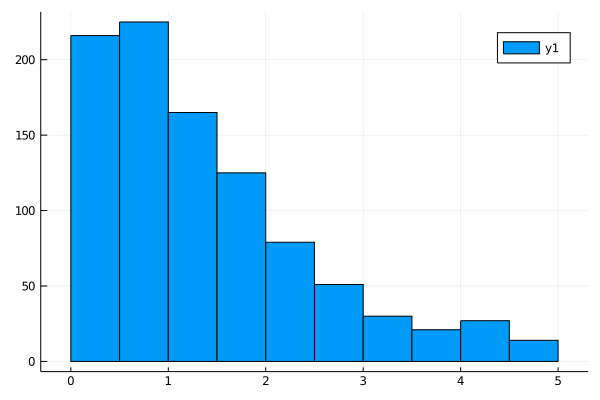

In [103]:
errors = results[1][3][2]
my_errors = Vector{Any}()
for e in errors
    if e < 5
        push!(my_errors, e)
    end
end
println(mean(my_errors))
histogram(my_errors)

In [96]:
weightsresults

3-element Array{Any,1}:
 (0.1, 30, (1.7899311152664583, [0.557973, 4.44885, 0.228306, 4.62438, 0.123549, 4.03626, 1.5439, 0.716159, 0.150416, 7.47809  …  10.5688, 8.39996, 0.918977, 0.717633, 0.99676, 10.4376, 0.224926, 3.14806, 4.01024, 2.24904]))
 (0.1, 70, (1.7210343149968694, [0.570788, 0.716843, 0.261485, 4.96483, 0.146831, 2.91744, 2.06295, 0.477852, 0.662672, 7.13032  …  4.51921, 7.12369, 0.517003, 0.766797, 2.8247, 8.63729, 1.05948, 3.38657, 4.72005, 3.34306]))
 (0.1, 100, (1.7549708238464046, [0.430561, 2.25288, 0.339484, 4.20612, 0.104167, 4.16838, 1.16274, 0.615239, 0.497601, 5.28446  …  2.83689, 2.17587, 2.77561, 0.722035, 1.4425, 8.97317, 0.828576, 3.10957, 4.21794, 1.91914]))

In [20]:
using CSV, DataFrames, DecisionTree, Distributions, Gurobi, JuMP, LightGraphs, Parameters, SparseArrays, Statistics, ArgParse

In [52]:
include("originalspo/oracles/shortest_path_oracle.jl")
include("originalspo/solver/util.jl")
include("originalspo/solver/sgd.jl")
include("originalspo/solver/reformulation.jl")
include("originalspo/solver/random_forests_po.jl")
include("originalspo/solver/validation_set.jl")
include("originalspo/experiments/replication_functions.jl")

function eval_spo()
    num_trials = 1

    num_lambda = 10
    lambda_max = 100
    lambda_min_ratio = 10.0^(-8)
    holdout_percent = 0.25
    regularization = :lasso
    different_validation_losses = false


    # Fixed parameter sets (these are also the same for all experiments)
    n_train_vec = [n_train]
    polykernel_degree_vec = [1]
    polykernel_noise_half_width_vec = [0]

    # Set this to get reproducible results
    rng_seed = 53


    # Run experiment and get results
    # Note that Gurobi enviornments are set within this function call
    err, loss = shortest_path_multiple_replications(X_train, c_train, X_validation, c_validation, X_test, c_test, rng_seed, num_trials, grid_dim,
        n_train_vec, n_test,
        p_features, polykernel_degree_vec, polykernel_noise_half_width_vec;
        num_lambda = num_lambda, lambda_max = lambda_max, lambda_min_ratio = lambda_min_ratio,
        holdout_percent = holdout_percent, regularization = regularization,
        different_validation_losses = different_validation_losses)

    return err
end


┌ Info: Recompiling stale cache file /home/rares/.julia/compiled/v1.0/Gadfly/DvECm.ji for Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1190


eval_spo (generic function with 1 method)

In [75]:
include("./local.jl")

dt_results = Vector{Any}()
all_dt_results = Vector{Any}()

for noise in 0.7:0.05:1.0
    println("NOISE: ", noise)
    
    X_train, c_train, X_validation, c_validation, X_test, c_test = 
        get_data(noise) 
    
    P = Local.Problem(sp_oracle, objective_fun, X_train', c_train');
    results, all_errors = cross_validate(P, 0.18:.02:.2; widths = [(100)], 
                                model = :dt, use_validation_data = false) 
    
    println("ERROR: ", results)
    push!(dt_results, results)
    push!(all_dt_results, all_errors)
end

NOISE: 0.7


0.05755878971335072
0.061556121153382895
0.058963559656866
0.05702638865954108
0.05887126927775786
0.05815260909189963
0.058493419135842016
0.05801722531125279
0.05846291745871854
0.05805842663744129
LOSS        : 0.05732002215469253
MEAN   ERROR: 0.05805842663744129
MEDIAN ERROR: 0.04881187448019433
0.18
0.05566150720301136
0.061775141124069684
0.06259557263878278
0.06326873014775111
0.0650795002820634
0.06390799334080906
0.06376148639685786
0.0627879387552064
0.06285908168104132
0.06212375122784467
LOSS        : 0.061191949053085094
MEAN   ERROR: 0.06212375122784467
MEDIAN ERROR: 0.05294932051255585
0.2
ERROR: Any[(0.18, 0.0580584), (0.2, 0.0621238)]
NOISE: 0.75
0.06068129730649323
0.0689245381064108
0.06721464087158024
0.06668156210782346
0.06480599414568192
0.06499234281631369
0.06590469860350652
0.06489674047712939
0.06392943370461622
0.06420421368443718
LOSS        : 0.06328801066519948
MEAN   ERROR: 0.06420421368443718
MEDIAN ERROR: 0.05486582000188235
0.18
0.05841263313172652
0

In [76]:
println(dt_results)

Any[Any[(0.18, 0.0580584), (0.2, 0.0621238)], Any[(0.18, 0.0642042), (0.2, 0.0637715)], Any[(0.18, 0.0658717), (0.2, 0.0657252)], Any[(0.18, 0.0683644), (0.2, 0.0685392)], Any[(0.18, 0.0714105), (0.2, 0.0692431)], Any[(0.18, 0.0698763), (0.2, 0.0645702)], Any[(0.18, 0.0698076), (0.2, 0.0704194)]]


In [78]:
# for i in 1:21
#     print(round(0.05 * (i - 1), digits = 2))
#     if i < 21 
#         print(" & ")
#     end
# end
# println("\\\\")

for i in 1:6 
    print(round(0.02 * (i - 1) + 0.18, digits=2))
    j = 1
    for k in 1:21
        if 0.05 * (k - 1) > 0.69
            print(" & ", round(100 * dt_results[j][i][2], digits = 2))
            j += 1
        else 
            print(" & --")
        end
    end
    print(" \\\\")
    println()
end

0.18 & -- & -- & -- & -- & -- & -- & -- & -- & -- & -- & -- & -- & -- & -- & 5.81 & 6.42 & 6.59 & 6.84 & 7.14 & 6.99 & 6.98 \\
0.2 & -- & -- & -- & -- & -- & -- & -- & -- & -- & -- & -- & -- & -- & -- & 6.21 & 6.38 & 6.57 & 6.85 & 6.92 & 6.46 & 7.04 \\
0.22 & -- & -- & -- & -- & -- & -- & -- & -- & -- & -- & -- & -- & -- & --

BoundsError: BoundsError: attempt to access 2-element Array{Any,1} at index [3]

In [50]:
size(dt_results)

(21,)

In [158]:
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(X_train', c_train')

function knn(x)
    return neigh.predict([x])[1,:]
end

eval_two_stage(knn)

(0.10300112803107282, [0.197188, 0.146474, 0.249858, 0.018818, 0.0994762, 0.0, 0.0, 0.0317817, 0.0172509, 0.324613  …  0.0176765, 0.235934, 0.0, 0.0, 0.159974, 0.215098, 0.155502, 0.0750189, 0.116663, 0.37093])

In [78]:

mlp = MLPRegressor(hidden_layer_sizes = (100, 50))
mlp.fit(X_train', c_train')

function MLP(x)
    return mlp.predict([x])[1,:]
end

eval_two_stage(MLP)

(0.4437656953590096, [0.229412, 0.334899, 0.30848, 1.03017, 0.290837, 1.57212, 0.102883, 0.0167671, 0.298518, 1.07719  …  0.208202, 0.59773, 0.825292, 0.454429, 0.248584, 0.360849, 0.273566, 0.736864, 0.781927, 0.515038])

In [145]:
@sk_import linear_model: LinearRegression 

linear = LinearRegression()
linear.fit(X_train', c_train')

function linear_mapping(x)
    return linear.predict([x])[1,:]
end

eval_two_stage(linear_mapping)

(0.3981883412719595, [0.0, 0.397776, 0.181413, 0.146147, 0.543787, 0.307279, 0.184522, 0.11517, 0.155517, 0.223307  …  0.461812, 0.613084, 0.516178, 0.0345766, 0.0, 0.626909, 0.416853, 0.378836, 0.144861, 0.131236])

In [146]:
eval_regression_tree()

(0.3332599837777854, (21, 10))

In [94]:
eval_spo()

Moving on to n_train = 200, polykernel_degree = 1, polykernel_noise_half_width = 0
Current trial is 1
Academic license - for non-commercial use only - expires 2021-07-23


┌ Warning: `Grid` is deprecated, use `grid` instead.
│   caller = convert_grid_to_list at shortest_path_oracle.jl:95 [inlined]
└ @ Core /home/rares/Desktop/spo/adamspo/oracles/shortest_path_oracle.jl:95


ArgumentError: ArgumentError: number of columns of each array must match (got (50, 25))